# UTS Deep Learning 
**Raymoond/2301872381**

# Import Library and Dataset
disini saya import semua library dan dataset yang nantinya akan dipakai di dalam code

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
import numpy as np
import pandas as pd
import keras_tuner as kt
import keras
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch

Pertama kita import semua fuction dan library yang dibutuhkan 

In [ ]:
#Import Data
train_data = pd.read_csv("train.csv")
x_data = train_data[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']]
y_data = train_data[['income_>50K']]

In [ ]:
train_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Disini kita ambil datanya dan memasukan ke train_data, disini saya hanya mengambil data yang valuen ya berupa integer,

# Preprocess& split data
disini saya melakukan preproceesing terhadap data menggukan scaler dan categorical dan nantinya akan melakukan split data dengan size 80 % dan 20 %


In [ ]:
#Preprocessing
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data)

Lalu data di preprocess dimana x data digunakan scaler dan y data digunakan encoder categorical

In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=1, stratify=y_data)

Lalu data di split ke 80% dan 20 % untuk dimasukan ke dalam model

# Keras Mode
Disini saya membuat keras model untuk mencari accuracynya

In [ ]:
#Keras Model 1
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
3517/3517 [==============================] - 14s 4ms/step - loss: 0.4290 - accuracy: 0.8062
Epoch 2/5
3517/3517 [==============================] - 12s 3ms/step - loss: 0.4000 - accuracy: 0.8170
Epoch 3/5
3517/3517 [==============================] - 12s 4ms/step - loss: 0.3975 - accuracy: 0.8185
Epoch 4/5
3517/3517 [==============================] - 13s 4ms/step - loss: 0.3973 - accuracy: 0.8180
Epoch 5/5
3517/3517 [==============================] - 12s 4ms/step - loss: 0.3961 - accuracy: 0.8180


Data yang sudah di preproces tadi kita masukin ke dalam model keras dengan binary crossentroy dan mengunakan adam optimizer, hal ini digunakan un tuk bisa mencari accuracy dari ini

# Tuning
DIsini saya melakukan tuning untuk mengubah layer sesuai yang soal inginkan yaitu n,2,1

In [ ]:
def build_model(hp):
    model = keras.Sequential()
 
    for i in range(hp.Int('num_layers',2,5)):
      model.add(layers.Dense(units=hp.Int('units_',
                                        min_value = 32,
                                        max_value = 512,
                                        step = 64),
                           activation = 'relu'))
    model.add(layers.Dense(2, activation ='sigmoid'))
    model.compile(
        optimizer = tf.keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values = [1e-2, 1e-3, 1e-4])),
        loss = 'binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='classification')

In [ ]:
tuner.search(x_train,y_train,
             epochs=5,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 01m 24s]
val_accuracy: 0.825712780157725

Best val_accuracy So Far: 0.8261298139890035
Total elapsed time: 00h 08m 00s
INFO:tensorflow:Oracle triggered exit


Disini kita melakukan tuning seperti yang soal inginkan yaitu agar layernya mejadi  (n,2,1) yang nantinya akan dibandingkan dengan model di atas

# Keras model2
disni saya melakukan modeling lagi namun dengan data yang sudah di tunin g

In [ ]:
#Keras Model 2
model = Sequential()
model.add(Dense(224, input_dim=6, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(x_train,y_train, epochs=5, validation_data=(x_test,y_test), batch_size=10)

Epoch 1/5
3517/3517 [==============================] - 15s 4ms/step - loss: 0.4023 - accuracy: 0.8159 - val_loss: 0.3823 - val_accuracy: 0.8199
Epoch 2/5
3517/3517 [==============================] - 15s 4ms/step - loss: 0.3912 - accuracy: 0.8212 - val_loss: 0.3815 - val_accuracy: 0.8210
Epoch 3/5
3517/3517 [==============================] - 14s 4ms/step - loss: 0.3888 - accuracy: 0.8227 - val_loss: 0.3784 - val_accuracy: 0.8246
Epoch 4/5
3517/3517 [==============================] - 15s 4ms/step - loss: 0.3879 - accuracy: 0.8228 - val_loss: 0.3778 - val_accuracy: 0.8234
Epoch 5/5
3517/3517 [==============================] - 14s 4ms/step - loss: 0.3876 - accuracy: 0.8226 - val_loss: 0.3791 - val_accuracy: 0.8247


Nah disini kita melakukan modeling lagi setelah di tuning, untuk mengecek perbedaan dari ke 2 model tersebut

# Classification report & Conffusion matrix
disini saya juga melakkan predict dan mecari classification report dan coffusion matrix terhadap data yang tadi sudah digunakan

In [ ]:
Predict = model.predict(x_test)
Predict = (Predict > 0.5).astype(int)

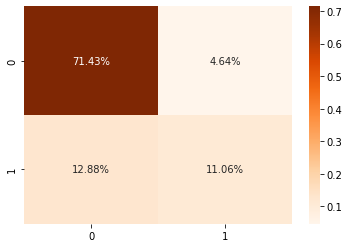

In [ ]:
# Confusion Matrix
Conf = confusion_matrix(
    y_test.argmax(axis=1), Predict.argmax(axis=1))
sns.heatmap(Conf/np.sum(Conf), annot=True, 
            fmt='.2%', cmap='Oranges')

In [ ]:
print(classification_report(y_test, Predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6688
           1       0.70      0.46      0.56      2104

   micro avg       0.82      0.82      0.82      8792
   macro avg       0.78      0.70      0.72      8792
weighted avg       0.81      0.82      0.81      8792
 samples avg       0.82      0.82      0.82      8792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test, Predict)

0.824385805277525

Setelah melakukan semua modeling tadi , kita tinggal menampilkanClassification Report(percision,recall,f1 score dan accuracy score) dan confusion matrix dari data yang di atas 

Dapat dilihat Dari Confusion matrix diatas, model ini mempunyai value false positive sebesar 4.64% dan False negative sebesar 12.88%.

Dan Accuracy Socrenye sebesar 82.43 %